In [1]:
pip install fredapi 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import plotly.express as px  # For high-level, declarative charting
import time  # For time-related tasks

# Set matplotlib style 
plt.style.use('fivethirtyeight')

# Configure pandas to display a maximum of 500 columns
pd.set_option('display.max_columns', 500)

# Define a color palette from the matplotlib plotting cycle
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Import the FRED (Federal Reserve Economic Data)  API 
from fredapi import Fred

# Define your FRED API key 
fred_key = ''


In [3]:
# Initialize the FRED API client with your API key to access economic data
fred = Fred(api_key=fred_key)

In [4]:
# Search for economic data series related to "S&P" in the FRED database, 
# ordering the results by popularity (most popular first)
sp_search = fred.search('S&P', order_by='popularity')

In [5]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-02-27,2024-02-27,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-02-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-02-27 07:46:03-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-02-27,2024-02-27,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2023-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-02-27 08:14:02-06:00,87,"For more information regarding the index, plea..."
SP500,SP500,2024-02-27,2024-02-27,S&P 500,2014-02-27,2024-02-26,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-02-26 19:10:59-06:00,84,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-02-27,2024-02-27,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-02-27,2024-02-27,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-02-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-02-27 07:46:07-06:00,82,This data represents the effective yield of th...


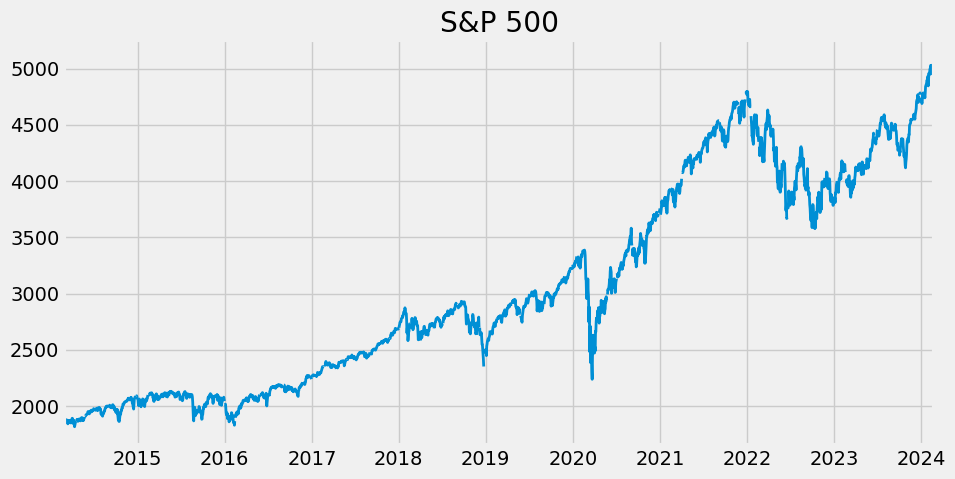

In [6]:
# Fetch the time series data for the S&P 500 index from FRED using its series ID 'SP500'
sp500 = fred.get_series(series_id='SP500')

# Plot the S&P 500 time series data with a specified figure size, title, and line width
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

# Display the plot
plt.show()


In [7]:
# Search the FRED database for series matching 'unemployment rate state' with a monthly frequency
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))

# Further filter the search results to include only those series that are seasonally adjusted
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

# Narrow down the dataset to include only the series with titles containing 'Unemployment Rate'
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]


In [8]:
# Initialize an empty list to store the results DataFrame for each series
all_results = []

# Loop through each series ID in the index of the filtered unemployment DataFrame
for myid in unemp_df.index:
    # Fetch the time series data for the current series ID from FRED
    results = fred.get_series(myid)
    
    # Convert the series object into a DataFrame with the series ID as the column name
    results = results.to_frame(name=myid)
    
    # Append the resulting DataFrame to the list of all results
    all_results.append(results)
    
    # Pause for 0.1 seconds between each request to avoid exceeding rate limits
    time.sleep(0.1) 

# Concatenate all individual DataFrames in the list into a single DataFrame along the columns
uemp_results = pd.concat(all_results, axis=1)

In [9]:
# Initialize an empty list to store the names of columns to be dropped
cols_to_drop = []

# Loop through each column name (series ID) in the 'uemp_results' DataFrame
for i in uemp_results:
    # Check if the column name (series ID) has more than four characters
    if len(i) > 4:
        # If true, append the column name to the 'cols_to_drop' list
        cols_to_drop.append(i)

# Drop the identified columns from the 'uemp_results' DataFrame
uemp_results = uemp_results.drop(columns=cols_to_drop, axis=1)

In [10]:
# Create a copy of the 'uemp_results' DataFrame 
uemp_states = uemp_results.copy()  

# Drop any rows that contain NaN values 
uemp_states = uemp_states.dropna()

# Create a dictionary that maps FRED series IDs to state names by stripping the prefix 'Unemployment Rate in '
# from the 'title' column in the 'unemp_df' DataFrame
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()

# Rename the columns of the 'uemp_states' DataFrame using the 'id_to_state' dictionary
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]


In [11]:
# Plot States Unemployment Rate
px.line(uemp_states)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=California<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'California',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'California',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 10, 1, 0, 0),
                          datetime.datetime(2023, 11, 1, 0, 0),
                          datetime.datetime(2023, 12, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.2, 9.2, 9.1, ..., 4.8, 4.9, 5.1]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Texas<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Texas',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Texas',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 10, 1, 0, 0),
                          datetime.datetime(2023, 11, 1, 0, 0),
                          datetime.datetime(2023, 12, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([5.8, 5.8, 5.9, ..., 4.1, 4.1, 4. ]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=New York<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'New York',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'New York',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 10, 1, 0, 0),
                          datetime.datetime(2023, 11, 1, 0, 0),
                          datetime.datetime(2023, 12, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([10.3, 10.3, 10.2, ...,  4.2,  4.3,  4.5]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Florida<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Florida',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Florida',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 10, 1, 0, 0),
                          datetime.datetime(2023, 11, 1, 0, 0),
                          datetime.datetime(2023, 12, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.7, 9.7, 9.6, ..., 2.8, 2.9, 3. ]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Pennsylvania<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Pennsylvania',
              'line': {'color': '#FFA15A', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Pennsylvania',
              'showlegend': True,
              'type': 'scattergl',
      

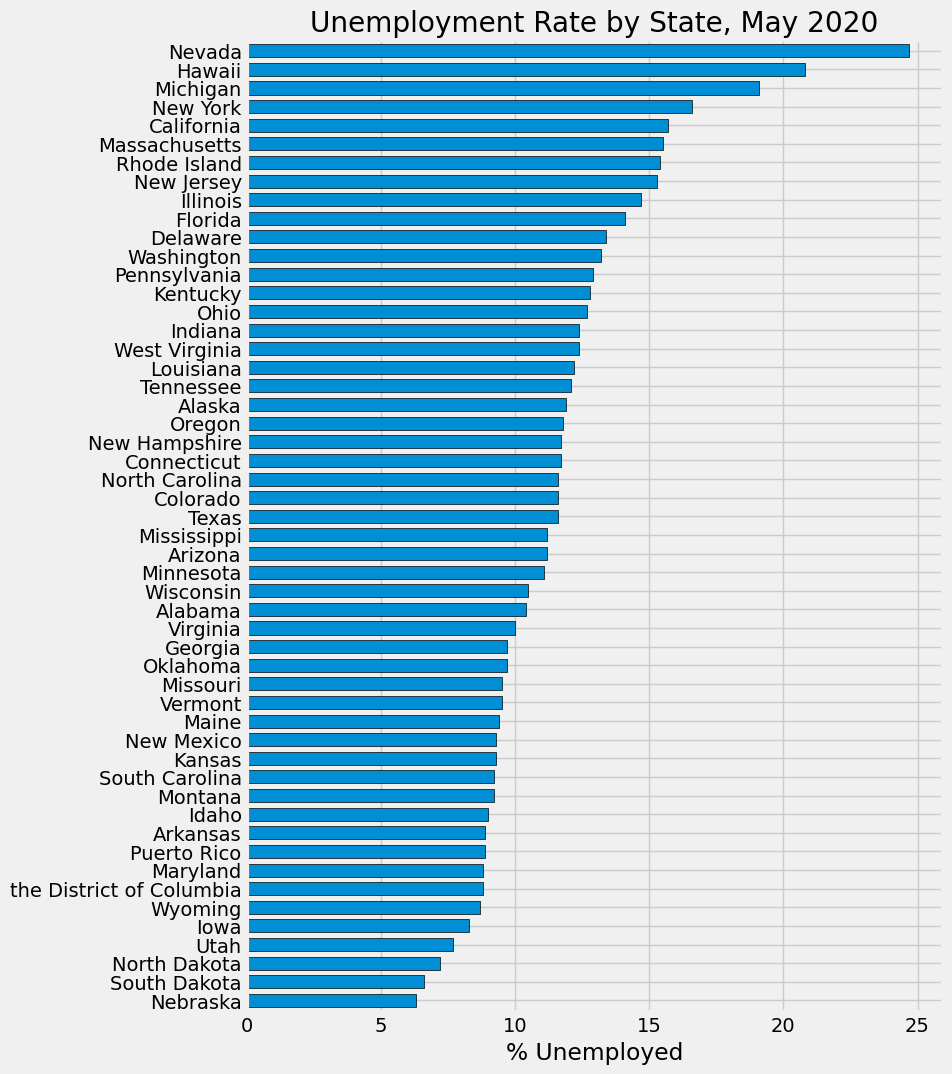

In [12]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

In [13]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [14]:
# Replace the series titles with more concise state names for readability
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()

# Initialize an empty list to hold the dataframes for each series
all_results = []

# Loop through each series ID in the 'part_df' index
for myid in part_df.index:
    # Fetch the series data from FRED using the series ID
    results = fred.get_series(myid)
    # Convert the series into a DataFrame and name the column after the series ID
    results = results.to_frame(name=myid)
    # Add the resulting DataFrame to our list of all results
    all_results.append(results)
    # Pause for a short time to avoid sending requests too quickly and getting blocked by the API
    time.sleep(0.1)

# Concatenate all the individual DataFrames into one, aligning them by their index (the dates)
part_states = pd.concat(all_results, axis=1)
# Rename the columns using the more readable state names from our 'part_id_to_state' mapping
part_states.columns = [part_id_to_state[c] for c in part_states.columns]


In [15]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

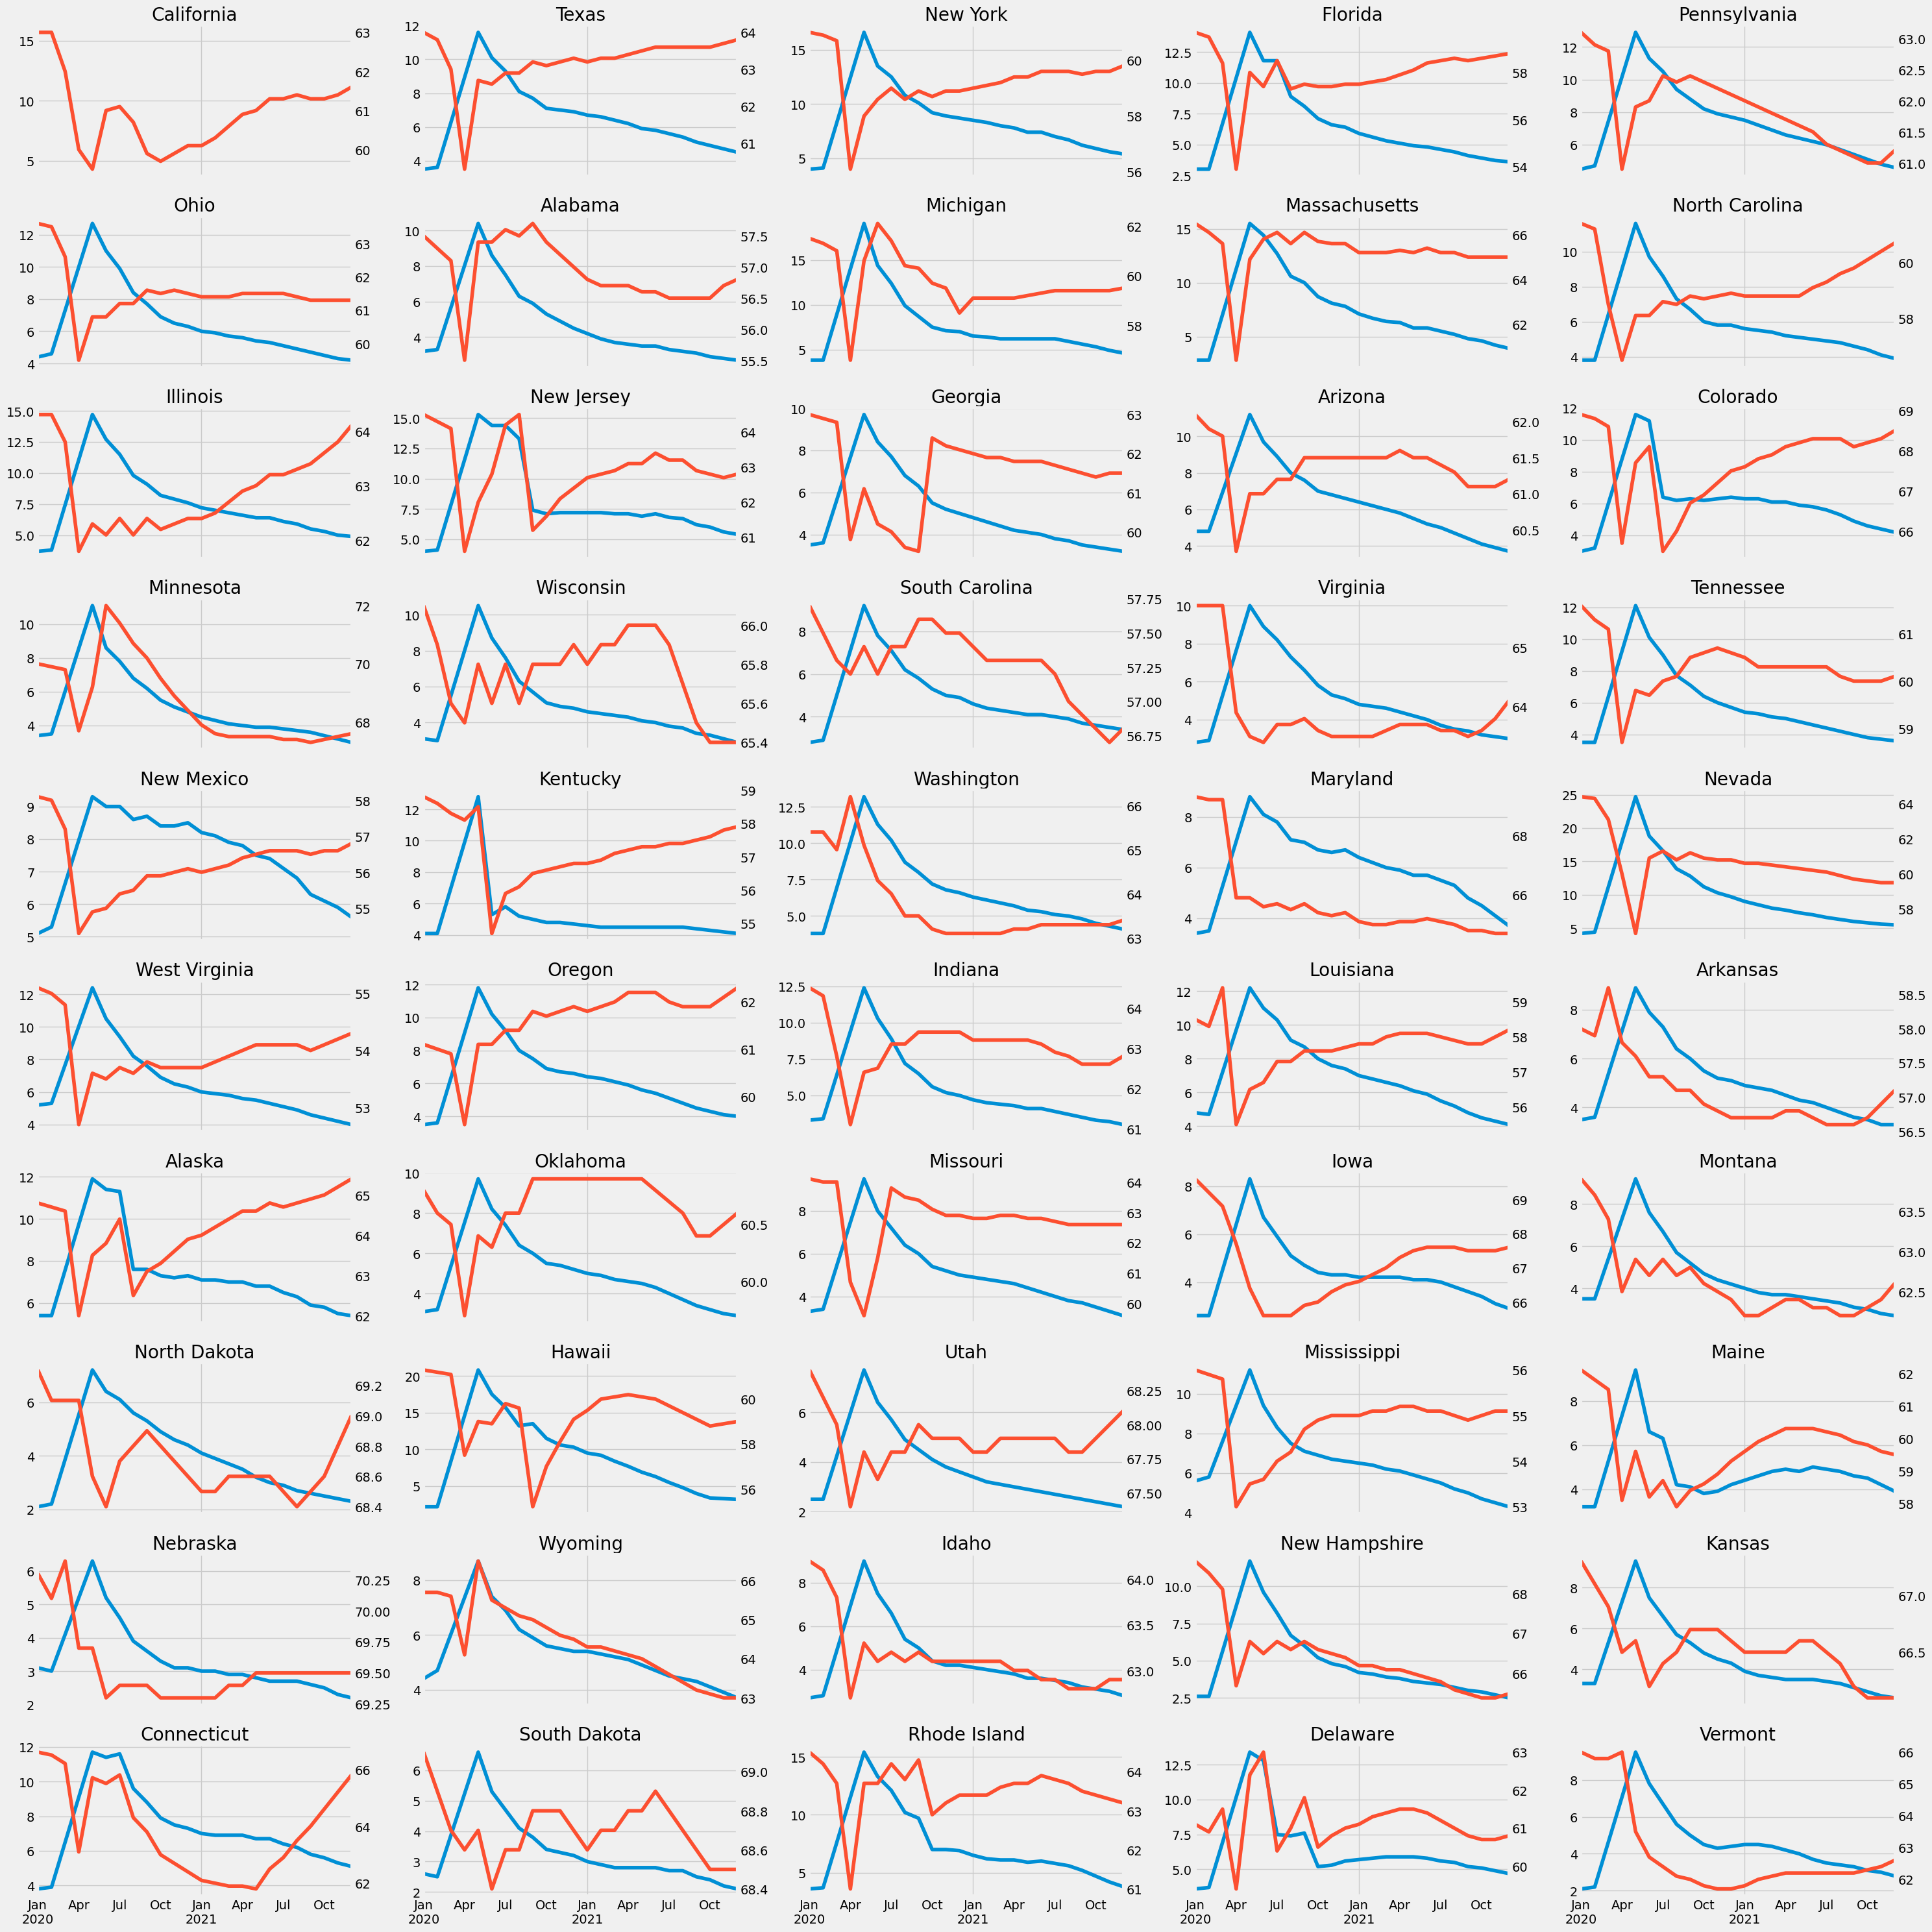

In [16]:
# Filter the 'uemp_states' DataFrame for the date '2020-05-01', transpose the result so states are rows,
# then sort the values by the unemployment rate for '2020-05-01'
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh',  # Create a horizontal bar chart
          figsize=(8, 12),  # Set the figure size
          width=0.7,  # Set the width of the bars
          edgecolor='black',  # Set the edge color of the bars
          title='Unemployment Rate by State, May 2020')  # Title of the chart

# Remove the legend, as it's not needed for this single-variable plot
ax.legend().remove()

# Set the x-axis label
ax.set_xlabel('% Unemployed')

# Display the plot
plt.show()

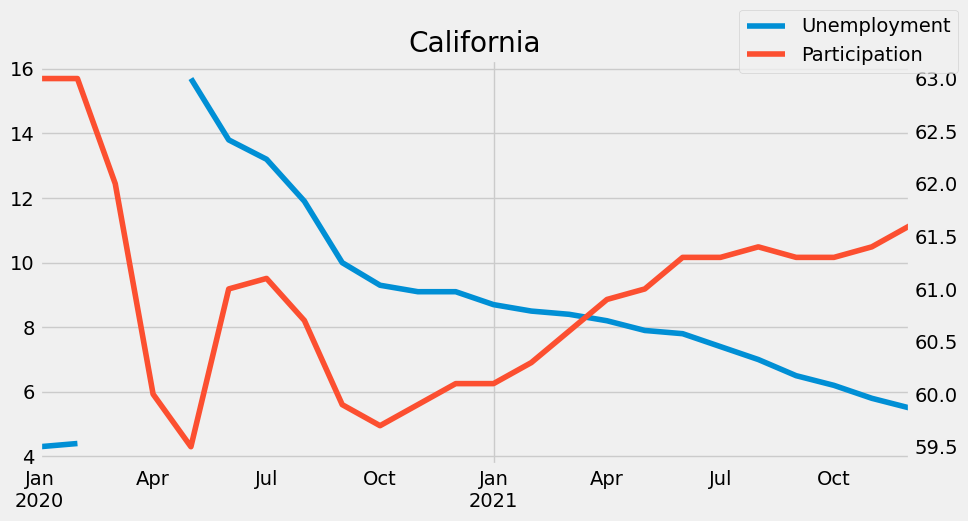

In [17]:
# Set up a figure and a primary axis
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)  # Create a figure and an axis with shared X-axis for alignment
ax2 = ax.twinx()  # Create a secondary y-axis that shares the same x-axis

# Ensure the 'uemp_states' DataFrame uses the start of the month as its frequency for consistent time series plotting
uemp_states2 = uemp_states.asfreq('MS')

# Plot the unemployment rate for California from 2020 to 2021 on the primary y-axis
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')

# plot the participation rate for California for the same period on the secondary y-axis
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])  # Using the second color from the predefined palette

ax2.grid(False)  # Disable the grid for the secondary axis to keep the chart clean

# Set the title of the plot to the state's name
ax.set_title(state)

# Add a legend to the figure to distinguish between the two metrics plotted
fig.legend(labels=['Unemployment', 'Participation'])

# Display the plot
plt.show()
